In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#INÍCIO DO DESAFIO 02
#COMO ESTE DESAFIO É UMA SEQUÊNCIA DO DESAFIO UM, E PARA QUE O PROFESSOR POSSA EXECUTAR TODOS OS DESAFIOS DE FORMA
#INDEPENDENTE, ESTAMOS COLOCANDO O CSV ORIUNDO DO DESAFIO 1 JUNTO À ESTE NOTEBOOK, PARA QUE NÃO 
#REPITAMOS O CÓDIGO DO DESAFIO 1 NOVAMENTE.

In [3]:
#SPLIT PARA TARGET E FEATURES

In [4]:
df = pd.read_csv('work_df_to_classifydataset.csv')
df.drop(df.columns[0], axis=1, inplace=True)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
df

,maiorAtraso,margemBrutaAcumulada,prazoMedioRecebimentoVendas,titulosEmAberto,diferencaPercentualRisco,percentualRisco,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,Risco_Baixo,Risco_Medio,Risco_Muito Baixo,cluster
0,0,0.252448,0,0.00,0.716981,0.283019,1766880,0,12,0,2003,90000,1,1,0,0,0
1,0,0.000000,0,0.00,1.000000,0.000000,0,16209878,10,28390609,2006,11214526,0,0,0,1,1
2,4,0.624777,0,0.00,0.716981,0.283019,2814940,0,7,0,2014,20000,1,1,0,0,0
3,20,0.000000,0,0.00,0.396226,0.603774,1285274,0,12,0,2013,30000,0,0,0,0,3
4,20,0.454088,20,1486.95,0.830189,0.169811,40779757,81459809,9,40680051,2002,75000,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8966,149,0.306580,59,599964.04,1.000000,0.000000,0,16209878,10,28390609,2006,11214526,0,0,0,1,1
8967,23,0.329796,0,0.00,1.000000,0.000000,0,16209878,10,28390609,2006,11214526,0,0,0,1,1
8968,3,0.383919,4,2933.38,1.000000,0.000000,0,16209878,10,28390609,2006,11214526,1,0,0,1,1
8969,11,0.424099,31,559679.98,1.000000,0.000000,0,16209878,10,28390609,2006,11214526,0,0,0,1,1


In [5]:
#SPLIT DO DATASET PARA TESTE E TREINO

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=25)

In [7]:
#GridSearchCV PARA DESCROBRIR QUAIS MELHORES PARÂMETROS PARA ESTE CLASSIFICADOR

In [8]:
grid_rf = RandomForestClassifier()
hyper_param = {'max_depth': np.arange(5,10)}
grid = GridSearchCV(grid_rf, hyper_param, cv=5)
grid.fit(X_train, y_train)
print("Melhor parâmetro: {}".format(grid.best_params_))
print("Melhor score: {}".format(grid.best_score_))

Melhor parâmetro: {'max_depth': 5}
Melhor score: 0.9988109612952047


In [9]:
#EXECUTO O MODELO COM OS MELHORES HYPER PARAMETERS

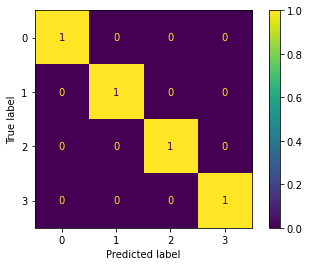

In [10]:
clf = RandomForestClassifier(max_depth=9, random_state=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_confusion_matrix(clf, X_test, y_test, normalize = 'true')

In [11]:
#MÉTRICAS

In [12]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("Null Acuracy:\n",pd.Series(y_test).value_counts().head(5) / len(pd.Series(y_test)))

print("Verdadeiro: ", pd.Series(y_test).values[0:37])
print("predito   : ", pd.Series(y_pred).values[0:37])

#Quão frequente o classificador está incorreto?
print("Classification Error: ", 1 - accuracy_score(y_test, y_pred))

#Quando o valor é positivo, quão frequente a predição está correta? (Recall)
print("Recal: ",recall_score(y_test, y_pred, average='weighted'))

#Quando um valor positivo é predito, quão frequente a predição está correta? (Precision)
print("Precision: ",precision_score(y_test, y_pred, average='weighted'))

[[1124    0    0    0]
 [   0  379    0    0]
 [   0    0   12    0]
 [   0    0    0  728]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1124
           1       1.00      1.00      1.00       379
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00       728

    accuracy                           1.00      2243
   macro avg       1.00      1.00      1.00      2243
weighted avg       1.00      1.00      1.00      2243

1.0
Null Acuracy:
 0    0.501115
3    0.324565
1    0.168970
2    0.005350
dtype: float64
Verdadeiro:  [0 1 3 1 0 3 0 0 0 0 3 0 0 3 0 0 0 0 1 3 1 1 0 0 0 0 0 1 1 0 3 0 0 1 0 0 3]
predito   :  [0 1 3 1 0 3 0 0 0 0 3 0 0 3 0 0 0 0 1 3 1 1 0 0 0 0 0 1 1 0 3 0 0 1 0 0 3]
Classification Error:  0.0
Recal:  1.0
Precision:  1.0


In [ ]:
#FIM DO DESAFIO 2